In [1]:
import sys 
sys.path.append("/work/nishika-image-search-work/")

import pandas as pd 
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2
import platform 

from utils.timer import timer 
# from utils.visualize import show_image

In [2]:
base_path = Path("/dataset/output")
df = pd.read_csv(base_path / "test_submission.csv")
print("length: ", len(df))
df.head()

length:  1542


,gid,cite_gid
0,1000565813,1000127296 1000507255 1000521395 1000326557 10...
1,1000632686,1000415115 1000489070 1000084760 1000172374 10...
2,1000685875,1000044747 1000651881 1000295156 1000305796 10...
3,1000052056,1000632032 1000264167 1000428514 1000251206 10...
4,1000832828,1000831731 1000616591 1000427512 1000692307 10...


In [3]:
print(df.iloc[1,:]["cite_gid"])

1000415115 1000489070 1000084760 1000172374 1000638892 1000019392 1000026260 1000768445 1000459158 1000053700 1000222828 1000197738 1000801291 1000063755 1000106974 1000543266 1000163063 1000591543 1000781766 1000317299


In [4]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(path):
    img = read_img(path)
    plt.imshow(img)
    plt.show()

def show_result_img_pair(path1, path2):
    
    plt.subplot(1, 2, 1)
    img = read_img(path1)
    plt.imshow(img)
    plt.title(f"出願: {path1.split('/')[-1]}", fontsize=12)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    img = read_img(path2)
    plt.imshow(img)
    plt.title(f"引用: {path2.split('/')[-1]}", fontsize=12)
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()



In [5]:
sample_row = df.iloc[0, :]
print(sample_row)
print(sample_row["cite_gid"].split(" ")[1])

cite_gid_list = [item for item in sample_row["cite_gid"].split(" ")]
print(cite_gid_list)

gid                                                1000565813
cite_gid    1000127296 1000507255 1000521395 1000326557 10...
Name: 0, dtype: object
1000507255
['1000127296', '1000507255', '1000521395', '1000326557', '1000050438', '1000003034', '1000466673', '1000133695', '1000689358', '1000569718', '1000459779', '1000473864', '1000555860', '1000737498', '1000169394', '1000658777', '1000858987', '1000044751', '1000644398', '1000060207']


In [6]:
input_base_path = Path("/dataset/")

/dataset/crop_test_images/1000745830/1000745830.jpg


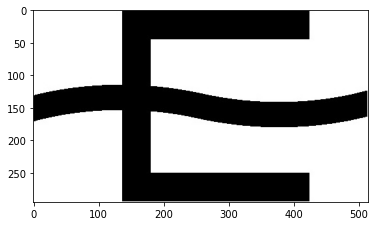

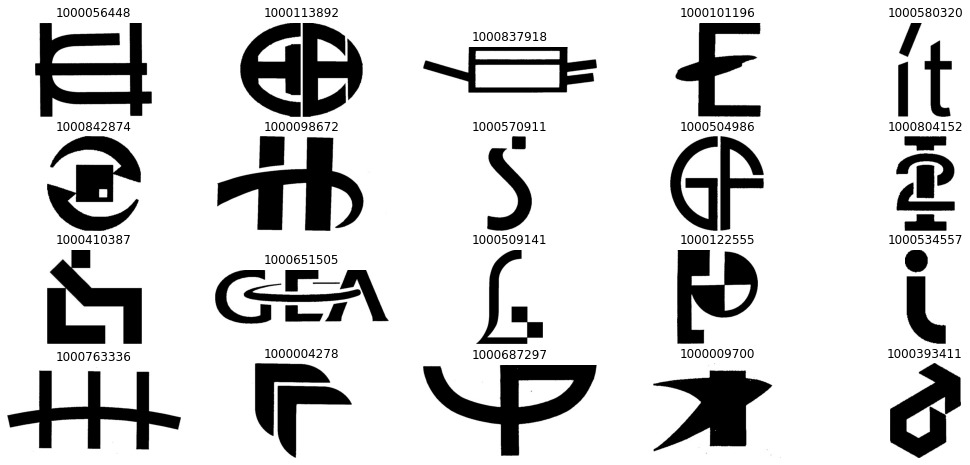

In [10]:
row_index = 5
gid_test_image = df.iloc[row_index, :]["gid"]
git_test_image_path = str(input_base_path / "crop_test_images" / f"{gid_test_image}" / f"{gid_test_image}.jpg")
print(git_test_image_path)

# print(type(df["gid_test_path"][1]))

show_img(git_test_image_path)

cite_gid_list = [item for item in df.iloc[row_index, :]["cite_gid"].split(" ")]
plt.figure(figsize=(18,8))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    ax.axis("off")
    ax.imshow(cv2.cvtColor(cv2.imread(str(input_base_path/"crop_cite_images"/cite_gid_list[i]/f"{cite_gid_list[i]}.jpg")), cv2.COLOR_BGR2RGB))
    ax.set_title(f"{cite_gid_list[i]}")

    